Part 1 – Data Preparation and Preprocessing.

Importing libraries

In [1]:
import pandas as pd

##### Reading the data

In [2]:
data = pd.read_csv("data.csv") 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


### Part 1 – Data Preparation and Preprocessing

##### Describe the dataset (e.g.: type of column, value range)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [5]:
data.describe(include='all')

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
count,318477.0,318477,306473,318477,197229,122658,197229,197229,318470,302302,318477.000000,318477.000000,302379
unique,318477.0,168065,40628,163,65,19,30,338,234287,250901,NaN,NaN,4
top,37404348.0,Project Manager,Jora Local,2018-10-17T00:00:00.000Z,Sydney,CBD & Inner Suburbs,Information & Communication Technology,Other,Whether they’re racing to fill shelves or scan...,"<p><strong>At ALDI, our people are the key to ...",NaN,NaN,Full Time
freq,1.0,1298,9354,13059,60765,32170,22796,11349,312,212,NaN,NaN,201225
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.813544,114.432342,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.063125,177.594941,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,40.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,70.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,120.000000,NaN


##### How many records are there in the dataset?

In [6]:
print("There are",data.shape[0], "rows in the dataset")

There are 318477 rows in the dataset


##### Which period does it cover? How many different dates have job postings?

In [7]:
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
print("The data covers the period starting from", min(data["Date"]).date(),"to", max(data["Date"]).date())

The data covers the period starting from 2018-10-01 to 2019-03-13


In [9]:
data["Date"].value_counts()

2018-10-17 00:00:00+00:00    13059
2018-12-14 00:00:00+00:00    11505
2019-01-22 00:00:00+00:00     9544
2019-01-10 00:00:00+00:00     8736
2018-10-31 00:00:00+00:00     8641
                             ...  
2019-03-03 00:00:00+00:00        3
2018-11-14 00:00:00+00:00        2
2019-01-25 00:00:00+00:00        2
2019-03-10 00:00:00+00:00        2
2019-03-09 00:00:00+00:00        1
Name: Date, Length: 163, dtype: int64

##### How many locations does the dataset have? Which location has the most job postings?

In [10]:
print("There are", len(data["Location"].value_counts()), "locations in the dataset")

There are 65 locations in the dataset


In [11]:
data["Location"].value_counts()

Sydney                                  60765
Melbourne                               46690
Brisbane                                21466
Perth                                   13198
Adelaide                                 6653
                                        ...  
Yorke Peninsula & Clare Valley             96
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64

In [12]:
print("Sydney has the most number of job postings")

Sydney has the most number of job postings


##### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings.

In [13]:
print("There are", len(data["Classification"].value_counts()), "Classifications in the dataset")

There are 30 Classifications in the dataset


In [14]:
data["Classification"].value_counts()

Information & Communication Technology    22796
Trades & Services                         17976
Healthcare & Medical                      17085
Hospitality & Tourism                     15523
Manufacturing, Transport & Logistics      12376
Administration & Office Support           10020
Accounting                                 9368
Education & Training                       9280
Construction                               8372
Sales                                      8119
Retail & Consumer Products                 8041
Government & Defence                       7443
Engineering                                6458
Mining, Resources & Energy                 6288
Banking & Financial Services               4633
Community Services & Development           4485
Legal                                      4237
Human Resources & Recruitment              4144
Call Centre & Customer Service             3971
Marketing & Communications                 3968
Real Estate & Property                  

##### Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

In [15]:
science_and_tech_data = data[data["Classification"]=="Science & Technology"]

In [16]:
print("There are", len(science_and_tech_data["SubClassification"].value_counts()), "Sub-sectors in the dataset")

There are 11 Sub-sectors in the dataset


In [17]:
science_and_tech_data["SubClassification"].value_counts()

Environmental, Earth & Geosciences                197
Laboratory & Technical Services                   167
Mathematics, Statistics & Information Sciences    121
Other                                              97
Biological & Biomedical Sciences                   82
Quality Assurance & Control                        80
Chemistry & Physics                                63
Food Technology & Safety                           46
Biotechnology & Genetics                           23
Materials Sciences                                 15
Modelling & Simulation                             14
Name: SubClassification, dtype: int64

##### List the job types. In each job type, what are the lowest salary and highest salary?

In [18]:
data.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [19]:
data["Salary Range"] = data["LowestSalary"].astype("string") + "-" + data["HighestSalary"].astype("string")

In [20]:
data["Salary Range"].value_counts()

0-30       62639
40-50      34436
70-80      28712
60-70      28499
100-120    27673
50-60      27027
150-200    25841
120-150    24514
80-100     24249
30-40      23476
200-999    11411
Name: Salary Range, dtype: Int64

In [21]:
data['JobType'].unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [22]:
job_types = list(data['JobType'].unique())[1:]
for job in job_types:
  print("The  lowest salary for",job,"is",data[data["JobType"] == job]['LowestSalary'].min())
  print("The  highest salary for",job,"is", data[data["JobType"] == job]['HighestSalary'].max())

The  lowest salary for Full Time is 0
The  highest salary for Full Time is 999
The  lowest salary for Contract/Temp is 0
The  highest salary for Contract/Temp is 999
The  lowest salary for Part Time is 0
The  highest salary for Part Time is 999
The  lowest salary for Casual/Vacation is 0
The  highest salary for Casual/Vacation is 999


In [23]:
print(data.LowestSalary)

0           0
1           0
2           0
3           0
4           0
         ... 
318472    200
318473    200
318474    200
318475    200
318476    200
Name: LowestSalary, Length: 318477, dtype: int64


Average Salary for each JobType

In [24]:
data["Average Salary"] = (data["LowestSalary"] + data["HighestSalary"])/2

In [25]:
data.Id

0         37404348
1         37404337
2         37404356
3         37404330
4         37404308
            ...   
318472    38564891
318473    38564940
318474    38552964
318475    38534438
318476    38561751
Name: Id, Length: 318477, dtype: object

In [26]:
data["Id_length"] = data["Id"].apply(lambda x: len(str(x)))

In [27]:
data.loc[data.Id_length!=8].head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
153767,37915260&searchrequesttoken=e859cc74-e22f-498d...,Shift Supervisor / Delivery Driver / Juniors,PIZZA HUT SOUTH MACKAY,2018-12-11 00:00:00+00:00,Mackay & Coalfields,NaN,Retail & Consumer Products,Management - Store,Shift Supervisor / Delivery Drivers / Juniors,NaN,0,30,NaN,0-30,15.0,64
153768,37915238&searchrequesttoken=e859cc74-e22f-498d...,Sales Support Administrator,Registry Australia,2018-12-11 00:00:00+00:00,Perth,"CBD, Inner & Western Suburbs",Administration & Office Support,Client & Sales Administration,Great opportunity to work at one of Australia'...,NaN,0,30,NaN,0-30,15.0,64


#### Removing inconsistencies

In [28]:
data['Id'] = data['Id'].apply(lambda x: str(x)[0:8])

#### Extract date from date time object

In [29]:
data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [30]:
# data['Date'] = data['Date'].dt.date

In [31]:
data['Id']=pd.to_numeric(data['Id'])

In [32]:
data['Date']=pd.to_datetime(data['Date'])
data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Id                 318477 non-null  int64              
 1   Title              318477 non-null  object             
 2   Company            306473 non-null  object             
 3   Date               318477 non-null  datetime64[ns, UTC]
 4   Location           197229 non-null  object             
 5   Area               122658 non-null  object             
 6   Classification     197229 non-null  object             
 7   SubClassification  197229 non-null  object             
 8   Requirement        318470 non-null  object             
 9   FullDescription    302302 non-null  object             
 10  LowestSalary       318477 non-null  int64              
 11  HighestSalary      318477 non-null  int64              
 12  JobType            302379 non-

In [34]:
data.loc[data['Id']==37915007]

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
154045,37915007,Early Childhood Educator - Casual,G8 Education,2018-12-11 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,Education & Training,Childcare & Outside School Hours Care,"Develop your future with G8 Education, we prom...",NaN,0,30,NaN,0-30,15.0,64
154047,37915007,Early Childhood Educator - Casual,G8 Education,2018-12-11 00:00:00+00:00,Sydney,Parramatta & Western Suburbs,Education & Training,Childcare & Outside School Hours Care,"Develop your future with G8 Education, we prom...",NaN,0,30,NaN,0-30,15.0,64


In [35]:
data_duplicates=data[data.duplicated()]

In [36]:
print(data_duplicates.shape)

(108, 16)


In [37]:
data.shape

(318477, 16)

In [38]:
data.drop_duplicates(inplace=True)

In [39]:
data.shape

(318369, 16)

Check missing data

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# get the sum of isna() in each column

missing_data=data.isna().sum()
missing_data

Id                        0
Title                     0
Company               11997
Date                      0
Location             121248
Area                 195787
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16135
LowestSalary              0
HighestSalary             0
JobType               16058
Salary Range              0
Average Salary            0
Id_length                 0
dtype: int64

In [42]:
missing_values=missing_data.tolist()
missing_columns=missing_data.index.tolist()

[Text(0.5, 1.0, 'missing data')]

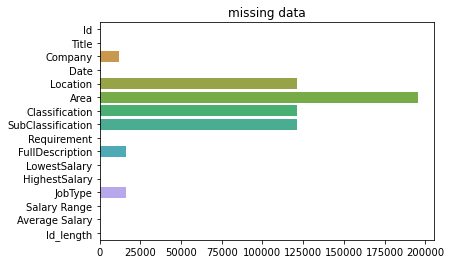

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=missing_values, y=missing_columns).set(title="missing data")

Part 2 – Data Understanding

In [74]:
data["Salary Range"].value_counts()

0-30       62586
40-50      34431
70-80      28706
60-70      28495
100-120    27669
50-60      27018
150-200    25833
120-150    24506
80-100     24249
30-40      23471
200-999    11405
Name: Salary Range, dtype: Int64

In [75]:
data["Average Salary"]

0          15.0
1          15.0
2          15.0
3          15.0
4          15.0
          ...  
318472    599.5
318473    599.5
318474    599.5
318475    599.5
318476    599.5
Name: Average Salary, Length: 318369, dtype: float64

Text(0.5, 1.0, 'Job distribution by average salary')

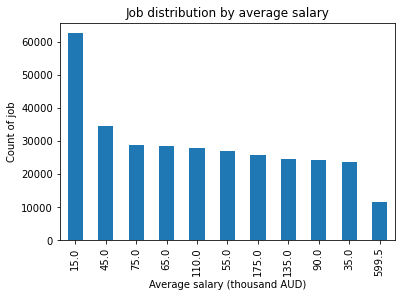

In [77]:
data["Average Salary"].value_counts().plot(kind='bar')
plt.ylabel('Count of job')
plt.xlabel('Average salary (thousand AUD)')
plt.title("Job distribution by average salary")

In [78]:
data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [79]:
data.JobType.unique()

array([nan, 'Full Time', 'Contract/Temp', 'Part Time', 'Casual/Vacation'],
      dtype=object)

In [80]:
data["JobType"].value_counts()

Full Time          201172
Contract/Temp       53897
Casual/Vacation     25353
Part Time           21889
Name: JobType, dtype: int64

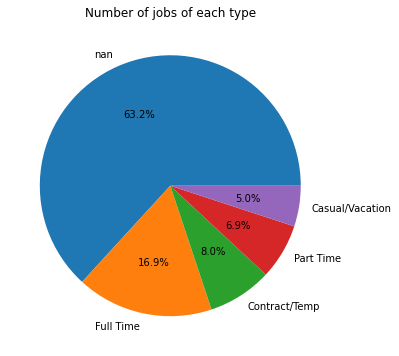

In [82]:
# Display the list of job types and the number of jobs of each type using pie chart.
fig = plt.figure(figsize = (6,6))

plt.pie(data["JobType"].value_counts(dropna=False), labels=data.JobType.unique(), autopct='%1.1f%%')
plt.title("Number of jobs of each type")
plt.show()

In [83]:
data.Classification.unique()

array(['Retail & Consumer Products', 'Call Centre & Customer Service',
       'Hospitality & Tourism', 'Banking & Financial Services',
       'Manufacturing, Transport & Logistics', 'Sales',
       'Administration & Office Support', 'Trades & Services',
       'Accounting', 'Real Estate & Property', 'Healthcare & Medical',
       'Marketing & Communications', 'Government & Defence',
       'Information & Communication Technology', 'Education & Training',
       'Community Services & Development', 'Mining, Resources & Energy',
       'Human Resources & Recruitment', 'Insurance & Superannuation',
       'Engineering', 'CEO & General Management', 'Design & Architecture',
       'Legal', 'Construction', 'Sport & Recreation',
       'Science & Technology', 'Advertising, Arts & Media',
       'Farming, Animals & Conservation', 'Self Employment',
       'Consulting & Strategy', nan], dtype=object)

[Text(0.5, 1.0, 'Number of jobs by classification')]

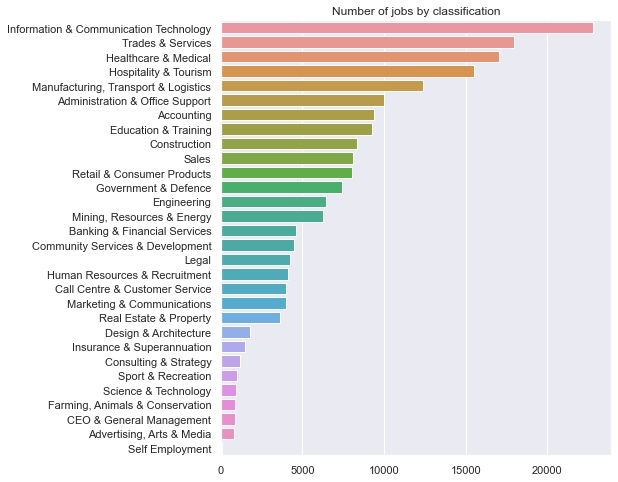

In [117]:
# get the index (classification) and the values (classification count) from the panda series
job_sectors=data.Classification.value_counts().sort_values(ascending=False).index
job_sectors_count=data.Classification.value_counts().sort_values(ascending=False).values

# changing the sns figure size
sns.set(rc={'figure.figsize':(7,8)})

sns.barplot(x=job_sectors_count, y=job_sectors).set(title="Number of jobs by classification")

In [225]:
# getting the Brisbane dataframe
Brisbane_data=data.loc[data.Location=='Brisbane']
Brisbane_data.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15.0,8
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,0-30,15.0,8
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,0-30,15.0,8
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07 00:00:00+00:00,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,0-30,15.0,8
40,37404400,Project Officer,Metro South Health,2018-10-07 00:00:00+00:00,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN,0-30,15.0,8


In [243]:
import numpy as np

Brisbane_data.loc[Brisbane_data["Classification"] == "Self Employment", "Classification"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Advertising, Arts & Media", "Classification"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Farming, Animals & Conservation", "Classification"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "CEO & General Management", "Classification"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Sport & Recreation", "Classification"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Science & Technology", "Classification"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Consulting & Strategy"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Design & Architecture"] = "Others"
Brisbane_data.loc[Brisbane_data["Classification"] == "Insurance & Superannuation"] = "Others"

Brisbane_data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15.0,8
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN,0-30,15.0,8
21,37404239,Casual Barista in Murarrie,Jora Local,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Bar & Beverage Staff,A cafe in Murarrie is seeking a casual Barista...,NaN,0,30,NaN,0-30,15.0,8
26,37404396,Clinical Document Processing and Quality Assur...,West Moreton Hospital and Health Service,2018-10-07 00:00:00+00:00,Brisbane,Western Suburbs & Ipswich,Administration & Office Support,Records Management & Document Control,administrative and systems support in relation...,NaN,0,30,NaN,0-30,15.0,8
40,37404400,Project Officer,Metro South Health,2018-10-07 00:00:00+00:00,Brisbane,NaN,Administration & Office Support,Other,Asset and Infrastructure Services are looking ...,NaN,0,30,NaN,0-30,15.0,8


In [244]:
# get the index (classification) and the values (classification count) from the Brisbane_data panda series
Brisbane_job_sectors=Brisbane_data.Classification.value_counts().sort_values(ascending=False).index
Brisbane_job_sectors_count=Brisbane_data.Classification.value_counts().sort_values(ascending=False).values

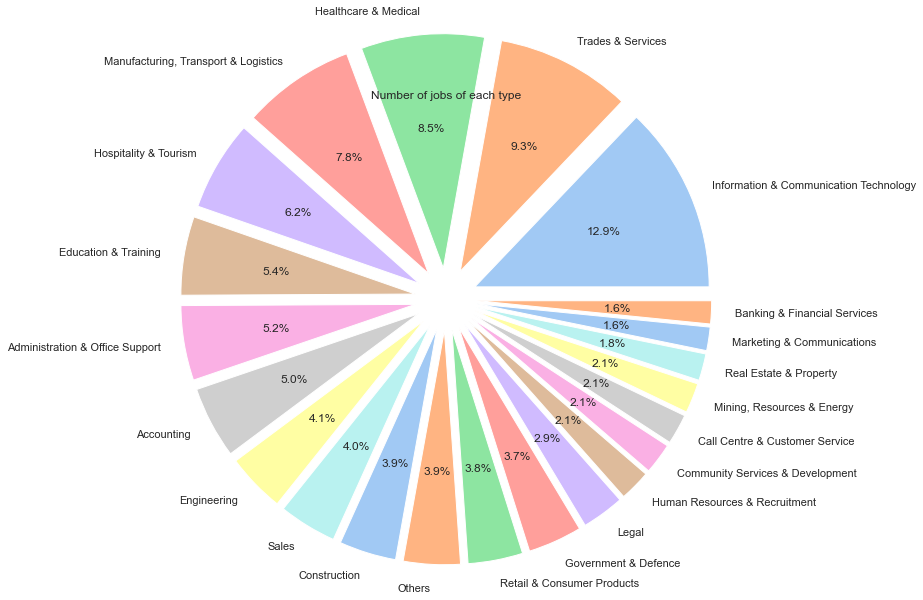

In [247]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:30]

# which slice explode by how much
explode = (0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2)

plt.pie(Brisbane_job_sectors_count, labels=Brisbane_job_sectors, autopct='%1.1f%%', colors=colors, radius=1.5, explode=explode)
plt.title("Number of jobs of each type")
plt.show()

In [280]:
Cities_series=data.Location.value_counts(ascending=False).head(30)
Cities_series.index.array

<PandasArray>
[                              'Sydney',
                            'Melbourne',
                             'Brisbane',
                                'Perth',
                             'Adelaide',
                                  'ACT',
         'Newcastle, Maitland & Hunter',
                           'Gold Coast',
                 'South West Coast VIC',
                  'Mackay & Coalfields',
     'Port Hedland, Karratha & Pilbara',
  'Wollongong, Illawarra & South Coast',
                       'Sunshine Coast',
                   'Cairns & Far North',
                         'Northern QLD',
              'Gosford & Central Coast',
            'Toowoomba & Darling Downs',
                               'Darwin',
                               'Hobart',
        'Blue Mountains & Central West',
   'Kalgoorlie, Goldfields & Esperance',
            'Lismore & Far North Coast',
 'Bendigo, Goldfields & Macedon Ranges',
               'Wagga Wagga & Riverina',
  

In [293]:
test_data=data
test_data.head(2)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8


In [329]:
# test_data = test_data.drop(test_data[test_data.Location in Cities_series.index.array].index)

test_data = test_data[test_data['Location'].isin(Cities_series.index.array)]
test_data.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Salary Range,Average Salary,Id_length
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,0-30,15.0,8
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,0-30,15.0,8
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,0-30,15.0,8
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15.0,8
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,0-30,15.0,8


In [325]:
test_data.HighestSalary.unique()

array([ 30,  40,  50,  60,  70,  80, 100, 120, 150, 200, 999], dtype=int64)

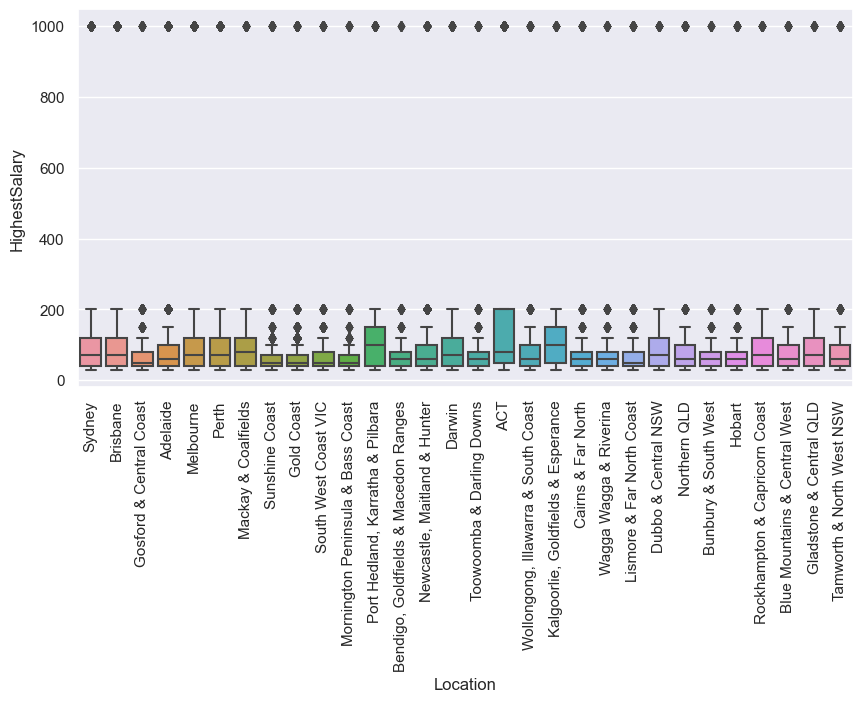

In [328]:
# data.boxplot(column="HighestSalary", by=Cities_series)
from matplotlib.pyplot import figure

figure(figsize=(10, 5), dpi=100)

sns.boxplot(x="Location", y="HighestSalary", data=test_data)
plt.xticks(rotation=90)
plt.show()